In [1]:
library(ggplot2)
library(RColorBrewer)
source("../../figures/utils/figure_themes.r")

width <- 8
height <- 6
options(repr.plot.width=width, repr.plot.height=height)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


In [2]:
# set path to the data morphology
class_df_morphology_path <- file.path("..","data","processed","aggregate_mAPs","morphology","mAP_scores_class.csv")
reg_df_morphology_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_regular_class.csv")
shuffled_df_morphology_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_shuffled_class.csv")
shuffled_feature_space_df_morphology_path <- file.path("..","data","processed","mAP_scores","morphology","mAP_scores_shuffled_feature_space_class.csv")
# read in the data
class_df_morphology <- read.csv(class_df_morphology_path)
reg_df_morphology <- read.csv(reg_df_morphology_path)
shuffled_df_morphology <- read.csv(shuffled_df_morphology_path)
shuffled_feature_space_df_morphology <- read.csv(shuffled_feature_space_df_morphology_path)

head(class_df_morphology)


# set path to the data secretome
class_df_secretome_path <- file.path("..","data","processed","aggregate_mAPs","secretome","mAP_scores_class.csv")
reg_df_secretome_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_regular_class.csv")
shuffled_df_secretome_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_shuffled_class.csv")
shuffled_feature_space_df_secretome_path <- file.path("..","data","processed","mAP_scores","secretome","mAP_scores_shuffled_feature_space_class.csv")
# read in the data
class_df_secretome <- read.csv(class_df_secretome_path)
reg_df_secretome <- read.csv(reg_df_secretome_path)
shuffled_df_secretome <- read.csv(shuffled_df_secretome_path)
shuffled_feature_space_df_secretome <- read.csv(shuffled_feature_space_df_secretome_path)

head(class_df_secretome)

,Metadata_labels,mean_average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,shuffled
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Apoptosis,0.05948675,0.58909503,0.25757575,0.58909503,False,False,features_shuffled
2,Apoptosis,0.64044601,0.06366906,0.86363640,0.06366906,False,False,non-shuffled
3,Apoptosis,0.08938349,0.03421409,0.92424244,0.03421409,False,False,phenotype_shuffled
4,Control,0.53048307,0.02020339,0.95454544,0.02020339,False,False,features_shuffled
5,Control,0.60331815,1.81954391,0.01515152,1.81954391,True,True,non-shuffled
6,Control,0.51707189,0.22847935,0.59090906,0.22847935,False,False,phenotype_shuffled


,Metadata_labels,mean_average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold,shuffled
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Apoptosis,0.11632370,0.6154239,0.24242425,0.6154239,False,False,features_shuffled
2,Apoptosis,0.73152095,1.8195439,0.01515152,1.8195439,True,True,non-shuffled
3,Apoptosis,0.07780334,0.2284794,0.59090906,0.2284794,False,False,phenotype_shuffled
4,Control,0.53934226,0.9164539,0.12121213,0.9164539,False,False,features_shuffled
5,Control,0.92054275,1.8195439,0.01515152,1.8195439,True,True,non-shuffled
6,Control,0.52678343,0.5185139,0.30303030,0.5185139,False,False,phenotype_shuffled


## Clean the class data

In [3]:
# declare the shuffled column as a factor
# replace the values in the shuffled column
# declare the shuffled column as a factor
# replace the values in the shuffled column
class_df_morphology$shuffled <- gsub("features_shuffled", "Shuffled features", class_df_morphology$shuffled)
class_df_morphology$shuffled <- gsub("phenotype_shuffled", "Shuffled phenotypes", class_df_morphology$shuffled)
class_df_morphology$shuffled <- gsub("non-shuffled", "Non-shuffled", class_df_morphology$shuffled)
class_df_morphology$shuffled <- factor(class_df_morphology$shuffled, levels = c( "Non-shuffled", "Shuffled features", "Shuffled phenotypes"))
class_df_morphology$Metadata_labels <- factor(class_df_morphology$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))

class_df_secretome$shuffled <- gsub("features_shuffled", "Shuffled features", class_df_secretome$shuffled)
class_df_secretome$shuffled <- gsub("phenotype_shuffled", "Shuffled phenotypes", class_df_secretome$shuffled)
class_df_secretome$shuffled <- gsub("non-shuffled", "Non-shuffled", class_df_secretome$shuffled)
class_df_secretome$shuffled <- factor(class_df_secretome$shuffled, levels = c( "Non-shuffled", "Shuffled features", "Shuffled phenotypes"))
class_df_secretome$Metadata_labels <- factor(class_df_secretome$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))



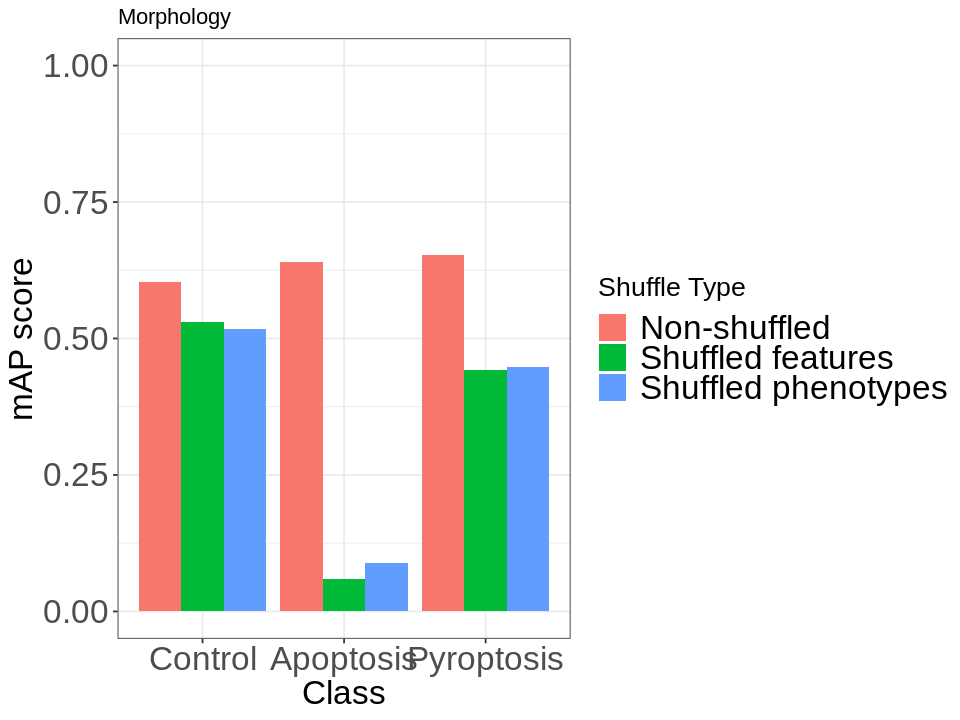

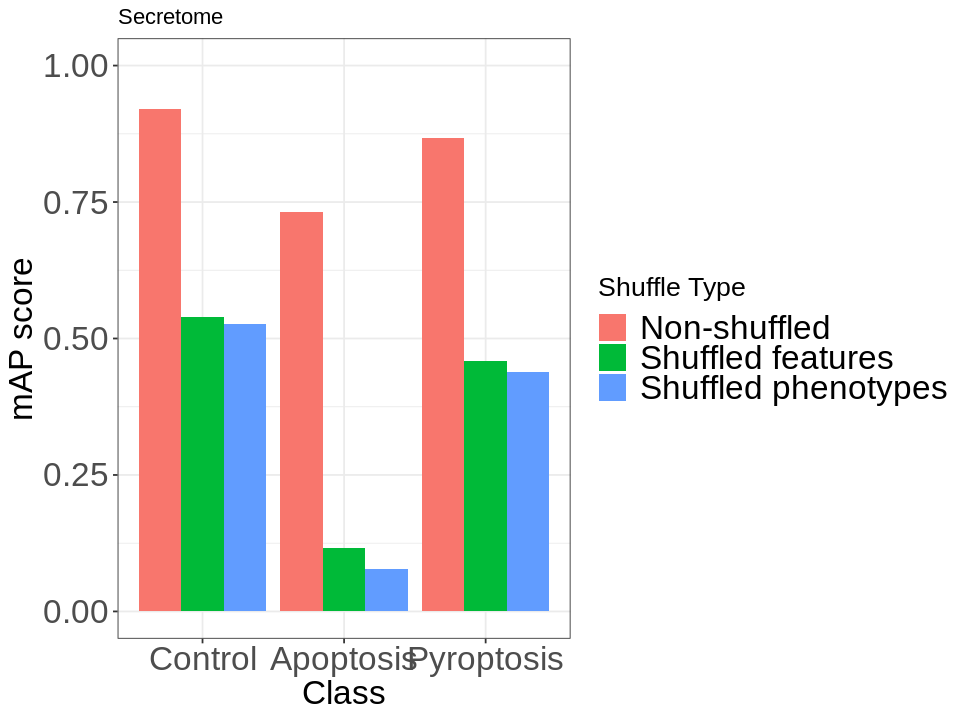

In [4]:
# plot the data
barplot_morphology <- (
    ggplot(class_df_morphology, aes(x=Metadata_labels, y=mean_average_precision, fill=shuffled))
    + geom_bar(stat="identity", position="dodge")
    + labs(x="Class", y="mAP score")
    # legend title
    + scale_fill_discrete(name="Shuffle Type")
    + theme_bw()
    + ylim(0,1)
    + ggtitle("Morphology")
    + figure_theme
)

barplot_secretome <- (
    ggplot(class_df_secretome, aes(x=Metadata_labels, y=mean_average_precision, fill=shuffled))
    + geom_bar(stat="identity", position="dodge")
    + labs(x="Class", y="mAP score")
    # legend title
    + scale_fill_discrete(name="Shuffle Type")
    + theme_bw()
    + ylim(0,1)
    + ggtitle("Secretome")
    + figure_theme

)


barplot_morphology
barplot_secretome



## Clean the single well data

In [5]:
# combine the dataframes
all_df_morphology <- rbind(reg_df_morphology, shuffled_df_morphology, shuffled_feature_space_df_morphology)
all_df_morphology$shuffled <- gsub("features_shuffled", "Shuffled features", all_df_morphology$shuffled)
all_df_morphology$shuffled <- gsub("phenotype_shuffled", "Shuffled phenotypes", all_df_morphology$shuffled)
all_df_morphology$shuffled <- gsub("non-shuffled", "Non-shuffled", all_df_morphology$shuffled)
all_df_morphology$shuffled <- factor(all_df_morphology$shuffled, levels = c( "Non-shuffled", "Shuffled features", "Shuffled phenotypes"))
all_df_morphology$Metadata_labels <- factor(all_df_morphology$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))
head(all_df_morphology)

all_df_secretome <- rbind(reg_df_secretome, shuffled_df_secretome, shuffled_feature_space_df_secretome)
all_df_secretome$shuffled <- gsub("features_shuffled", "Shuffled features", all_df_secretome$shuffled)
all_df_secretome$shuffled <- gsub("phenotype_shuffled", "Shuffled phenotypes", all_df_secretome$shuffled)
all_df_secretome$shuffled <- gsub("non-shuffled", "Non-shuffled", all_df_secretome$shuffled)
all_df_secretome$shuffled <- factor(all_df_secretome$shuffled, levels = c( "Non-shuffled", "Shuffled features", "Shuffled phenotypes"))
all_df_secretome$Metadata_labels <- factor(all_df_secretome$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))
head(all_df_secretome)

,Metadata_Well,Metadata_labels,average_precision,p_value,n_pos_pairs,n_total_pairs,shuffled
,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
1,B02,Pyroptosis,0.6058954,0.01515152,64,153,Non-shuffled
2,B03,Pyroptosis,0.4928594,0.10606061,64,153,Non-shuffled
3,B04,Pyroptosis,0.8348631,0.01515152,64,153,Non-shuffled
4,B05,Pyroptosis,0.8197766,0.01515152,64,153,Non-shuffled
5,B06,Control,0.7005115,0.01515152,80,153,Non-shuffled
6,B07,Control,0.6046329,0.09090909,80,153,Non-shuffled


,Metadata_Well,Metadata_labels,average_precision,p_value,n_pos_pairs,n_total_pairs,shuffled
,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
1,B02,Pyroptosis,0.8391197,0.01515152,64,148,Non-shuffled
2,B03,Pyroptosis,0.8141105,0.01515152,64,148,Non-shuffled
3,B04,Pyroptosis,0.9344528,0.01515152,64,148,Non-shuffled
4,B05,Pyroptosis,0.9557513,0.01515152,64,148,Non-shuffled
5,B06,Control,0.9469294,0.01515152,75,148,Non-shuffled
6,B07,Control,0.9118654,0.01515152,75,148,Non-shuffled


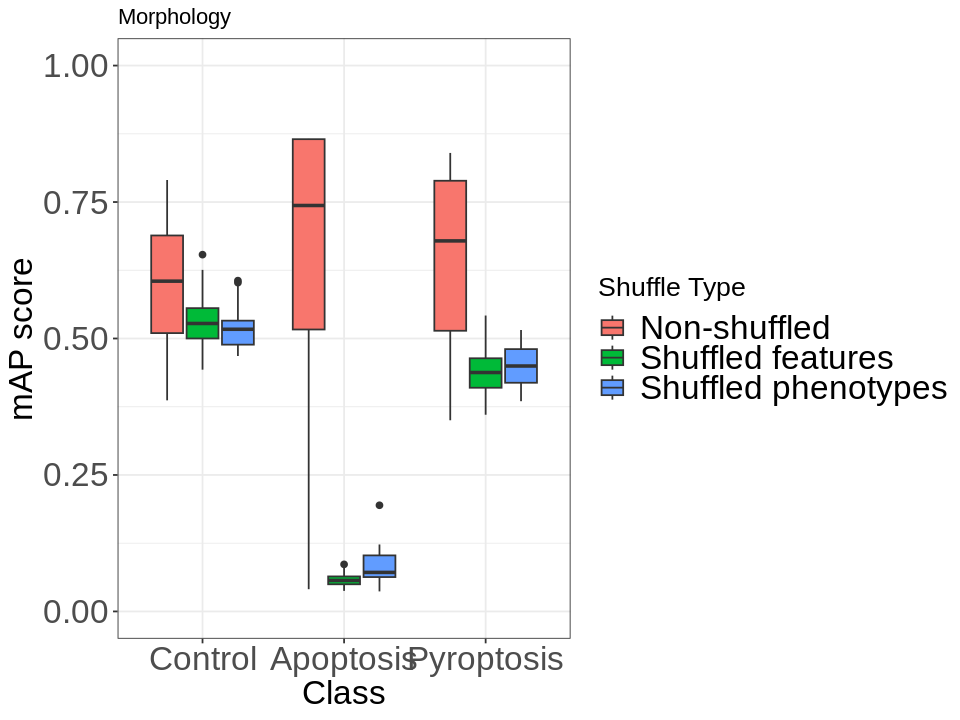

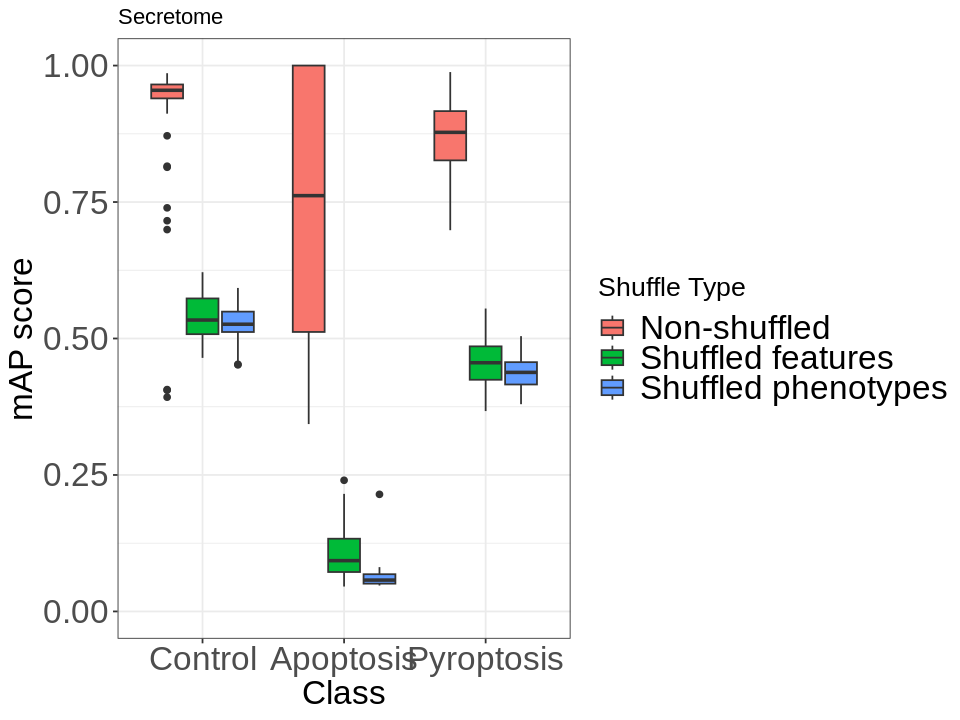

In [6]:
boxplot_morphology <- (
    ggplot(all_df_morphology, aes(x=Metadata_labels, y=average_precision, fill=shuffled))
    + geom_boxplot()
    + labs(x="Class", y="mAP score")
    # legend title
    + scale_fill_discrete(name="Shuffle Type")
    + theme_bw()
    + ylim(0,1)
    + ggtitle("Morphology")
    + figure_theme

    
)
boxplot_morphology

boxplot_secretome <- (
    ggplot(all_df_secretome, aes(x=Metadata_labels, y=average_precision, fill=shuffled))
    + geom_boxplot()
    + labs(x="Class", y="mAP score")
    # legend title
    + scale_fill_discrete(name="Shuffle Type")
    + theme_bw()
    + ylim(0,1)
    + ggtitle("Secretome")
    + figure_theme

    
)
boxplot_secretome

## mAP Scatter compare plot

In [7]:
# cobine the dfs
head(all_df_morphology)
# get the average precision, shuffled, and Metadata_labels columns by name
subset_morphology <- all_df_morphology[,c("average_precision", "shuffled", "Metadata_labels")]
# rename the average_precision column to moprhology_ap
colnames(subset_morphology)[colnames(subset_morphology)=="average_precision"] <- "morphology_ap"

# get the average precision, shuffled, and Metadata_labels columns by name
subset_secretome <- all_df_secretome[,c("average_precision", "shuffled", "Metadata_labels")]
# rename the average_precision column to secretome_ap
colnames(subset_secretome)[colnames(subset_secretome)=="average_precision"] <- "secretome_ap"

# merge the dataframes
merged_df <- merge(subset_morphology, subset_secretome, by=c("shuffled", "Metadata_labels"))
head(merged_df)



,Metadata_Well,Metadata_labels,average_precision,p_value,n_pos_pairs,n_total_pairs,shuffled
,<chr>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
1,B02,Pyroptosis,0.6058954,0.01515152,64,153,Non-shuffled
2,B03,Pyroptosis,0.4928594,0.10606061,64,153,Non-shuffled
3,B04,Pyroptosis,0.8348631,0.01515152,64,153,Non-shuffled
4,B05,Pyroptosis,0.8197766,0.01515152,64,153,Non-shuffled
5,B06,Control,0.7005115,0.01515152,80,153,Non-shuffled
6,B07,Control,0.6046329,0.09090909,80,153,Non-shuffled


,shuffled,Metadata_labels,morphology_ap,secretome_ap
,<fct>,<fct>,<dbl>,<dbl>
1,Non-shuffled,Apoptosis,0.8179272,1.0000000
2,Non-shuffled,Apoptosis,0.8179272,1.0000000
3,Non-shuffled,Apoptosis,0.8179272,1.0000000
4,Non-shuffled,Apoptosis,0.8179272,0.5312370
5,Non-shuffled,Apoptosis,0.8179272,0.5412353
6,Non-shuffled,Apoptosis,0.8179272,0.9821429


In [8]:
# aggregate the data by shuffled and Metadata_labels
merged_agg <- aggregate(. ~ shuffled + Metadata_labels, data=merged_df, FUN=mean)
# combine the shuffled and Metadata_labels columns
merged_agg$group <- paste(merged_agg$shuffled, merged_agg$Metadata_labels, sep="_")
# change the text in the group column
merged_agg$group <- gsub("Non-shuffled_Control", "Non-shuffled\nControl", merged_agg$group)
merged_agg$group <- gsub("Shuffled features_Control", "Shuffled features\nControl", merged_agg$group)
merged_agg$group <- gsub("Shuffled phenotypes_Control", "Shuffled phenotypes\nControl", merged_agg$group)
merged_agg$group <- gsub("Non-shuffled_Apoptosis", "Non-shuffled\nApoptosis", merged_agg$group)
merged_agg$group <- gsub("Shuffled features_Apoptosis", "Shuffled features\nApoptosis", merged_agg$group)
merged_agg$group <- gsub("Shuffled phenotypes_Apoptosis", "Shuffled phenotypes\nApoptosis", merged_agg$group)
merged_agg$group <- gsub("Non-shuffled_Pyroptosis", "Non-shuffled\nPyroptosis", merged_agg$group)
merged_agg$group <- gsub("Shuffled features_Pyroptosis", "Shuffled features\nPyroptosis", merged_agg$group)
merged_agg$group <- gsub("Shuffled phenotypes_Pyroptosis", "Shuffled phenotypes\nPyroptosis", merged_agg$group)
# make the group column a factor
merged_agg$group <- factor(
    merged_agg$group, 
    levels = c(
        "Non-shuffled\nControl", 
        "Shuffled features\nControl", 
        "Shuffled phenotypes\nControl", 

        "Non-shuffled\nApoptosis", 
        "Shuffled features\nApoptosis", 
        "Shuffled phenotypes\nApoptosis",
        
        "Non-shuffled\nPyroptosis",
        "Shuffled features\nPyroptosis", 
        "Shuffled phenotypes\nPyroptosis"))

merged_agg

shuffled,Metadata_labels,morphology_ap,secretome_ap,group
<fct>,<fct>,<dbl>,<dbl>,<fct>
Non-shuffled,Control,0.60331815,0.92054275,Non-shuffled Control
Shuffled features,Control,0.53048307,0.53934226,Shuffled features Control
Shuffled phenotypes,Control,0.51707189,0.52678343,Shuffled phenotypes Control
Non-shuffled,Apoptosis,0.64044601,0.73152095,Non-shuffled Apoptosis
Shuffled features,Apoptosis,0.05948675,0.11632370,Shuffled features Apoptosis
Shuffled phenotypes,Apoptosis,0.08938349,0.07780334,Shuffled phenotypes Apoptosis
Non-shuffled,Pyroptosis,0.65299176,0.86662587,Non-shuffled Pyroptosis
Shuffled features,Pyroptosis,0.44293609,0.45922994,Shuffled features Pyroptosis
Shuffled phenotypes,Pyroptosis,0.44856035,0.43906012,Shuffled phenotypes Pyroptosis


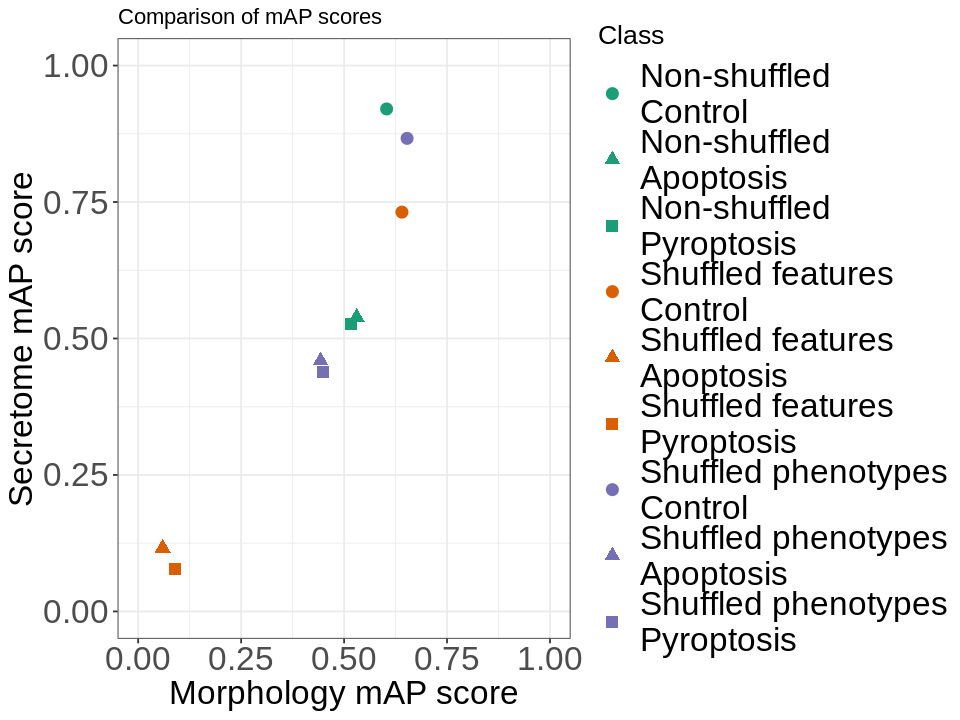

In [9]:
# plot the data
scatter_compare <- (
    ggplot(merged_agg, aes(x=morphology_ap, y=secretome_ap, col = group, shape=group))
    + geom_point(size=3, alpha=1)
    + labs(x="Morphology mAP score", y="Secretome mAP score")
    + theme_bw()
    + ggtitle("Comparison of mAP scores")
    + ylim(0,1)
    + xlim(0,1)
    # Change the legend title
    # change the legend shape
    + scale_shape_manual(
        name="Class",
        labels=c(
            "Non-shuffled\nControl", 
            "Non-shuffled\nApoptosis", 
            "Non-shuffled\nPyroptosis", 

            "Shuffled features\nControl", 
            "Shuffled features\nApoptosis", 
            "Shuffled features\nPyroptosis", 

            "Shuffled phenotypes\nControl", 
            "Shuffled phenotypes\nApoptosis", 
            "Shuffled phenotypes\nPyroptosis"
        ),
        values=c(19, 17, 15, 19, 17, 15, 19, 17, 15)
    )
    + scale_color_manual(
        name="Class",
        labels=c(
            "Non-shuffled\nControl", 
            "Non-shuffled\nApoptosis", 
            "Non-shuffled\nPyroptosis", 

            "Shuffled features\nControl", 
            "Shuffled features\nApoptosis", 
            "Shuffled features\nPyroptosis", 

            "Shuffled phenotypes\nControl", 
            "Shuffled phenotypes\nApoptosis", 
            "Shuffled phenotypes\nPyroptosis"
        ),
        values=c(
            brewer.pal(3, "Dark2")[1],
            brewer.pal(3, "Dark2")[1],
            brewer.pal(3, "Dark2")[1],
            brewer.pal(3, "Dark2")[2],
            brewer.pal(3, "Dark2")[2],
            brewer.pal(3, "Dark2")[2],
            brewer.pal(3, "Dark2")[3],
            brewer.pal(3, "Dark2")[3],
            brewer.pal(3, "Dark2")[3]
    )
)
    + figure_theme

)
scatter_compare